# **k-NN Classification** 

### Introduction

The purpose of this assignment is to get you familiar with the k nearest neighbor classification. You will be training a k-NN model and using it to classify images of handwritten digits from the famous **MNIST dataset**, which contains 70,000
images of digits and their respective labels. You will first implement the code from scratch and then replicate the entire code using the scikit-learn library.

## **Part 1: Implement from Scratch**

You are not allowed to use scikit-learn or any other machine learning toolkit for this
part. You have to implement your own k-NN classifier from scratch. You may use
Pandas, NumPy, Matplotlib, Seaborn, and other standard Python libraries.

### Importing Libraries

In [1]:
# Importing relevant libraries. You may add other libraries if needed (except scikit-learn or any other machine learning toolkit)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image as im
from scipy.stats import mode
from collections import Counter
import statistics

### Loading Dataset

The MNIST dataset consists of 70,000 labelled images of handwritten digits, each of size 28 pixels by 28 pixels. 

The dataset given to you is in a CSV file. The CSV file has 70,001 rows and 785 columns. Each row represents one image of a handwritten digit.
The first row indicates what each column means (Print the loaded dataset to understand this). You should remove this row when creating the dataset. 
The first column gives the label (a number from 0 to 9). The next 784 columns give the value of each pixel. There are 784 pixels in each image corresponding to an image size of 28 by 28.

You can use the Pandas library to load the CSV file but the final dataset should be stored in a Numpy array of shape (70000, 785).

In [2]:
# Load the dataset from the folder on Drive where you have saved the dataset. Path will be like "/content/drive/..." 

#########################

# Enter your code here
dataset = pd.read_csv('mnist.csv')
dataset = dataset.drop(0)
data = np.array(dataset)
data.shape

#########################

C:\Users\ayesh\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246

(70000, 785)

In [ ]:

#########################

# Enter your code here
dataset = pd.read_csv('mnist.csv')
dataset = dataset.drop(0)
data = np.array(dataset)
data.shape

#########################

In [3]:
reduced_dataset = []
for i in range(0, 14000):
  reduced_dataset.append(data[i])
reduced_dataset = np.array(reduced_dataset).astype('uint8')
reduced_dataset.shape

(14000, 785)

In [4]:
# Implement a function to display an image from your loaded dataset given the image index. 
# You can use the Pillow library for this purpose.


def display_image(image_ind):
  image_indd = reduced_dataset[image_ind]
  image = []
  for i in range(1,len(image_indd)):
    image.append(image_indd[i])
  ima = np.reshape(image,(28,28))
  img = im.fromarray(ima.astype(np.uint8))
  plt.imshow(img)

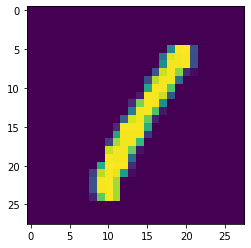

In [5]:
# Now you can display different images to visualize them
display_image(3)

Now divide the dataset into training and test sets (around an 85-15 split).
More precisely, take the first 60,000 images for the training set and the last 10,000 for the test set.

Both the resulting splits/sets should be stored in Numpy arrays of shape (num_split_images, 785).
Depending on your approach, you can also separate the labels into a different array (or two arrays).

In [6]:
# Train-test split

#########################
def image_data(a):
  image = []
  for i in range(1,len(a)):
    image.append(a[i])
  return image
# Enter your code here
test_data = []
train_data = []
test_label = []
train_label = []

for i in range(0,11900):
  a = reduced_dataset[i]
  train_label.append(a[0])
  train_data.append(image_data(a))

for i in range(11900,14000):
  a = reduced_dataset[i]
  test_label.append(a[0])
  test_data.append(image_data(a))

train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)


print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

#########################

(11900, 784)
(11900,)
(2100, 784)
(2100,)


### Implementing k-NN Classifier

Now you need to implement all of the tasks that follow.

First, implement separate functions for the Euclidean and Manhattan distances. Formulas for both are given below.

**Euclidean Distance:**

$$
d(\vec{p},\vec{q}) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2 + ... + (p_n - q_n)^2}
$$

**Manhattan Distance:**

$$
d(\vec{p},\vec{q}) = |(p_1 - q_1)| + |(p_2 - q_2)| + |(p_3 - q_3)| + ... + |(p_n - q_n)|
$$

In [7]:
# Implement functions for Euclidean and Manhattan distances

#########################
def euclideanDistance (p,q):
  return np.sqrt(np.sum((p-q)**2))
def manhattanDistance(p,q):
  return np.sum(abs(p-q))
#########################

Next, create your own k-Nearest Neighbors classifier function by performing the following
tasks:
1. For a test data point, find its distance from all training
instances.
2. Sort the calculated distances in ascending order based on distance values.
3. Choose k training samples with minimum distances from the test data point.
4. Return the most frequent class of these samples. (Your function should work
with Euclidean distance as well as Manhattan distance. Pass the distance
metric as a parameter in the k-NN classifier function. Your function should
also be general enough to work with any value of k.)

For values of k where a tie occurs, you need to break the tie by backing off to the k-1 value. In case there is still a tie, you will continue decreasing k until there is a clear winner.

In [8]:
# Implement k-Nearest Neighbors classifier function
# Feel free to make any helper functions to assist you and to make the code modular

#########################

# Enter your code here
def findClass(distances, k):
  s = False
  while (s == False):
    distance = dict(sorted(distances.items(), key= lambda item: item[0]))

    label_values = list(distances.values())
    
    nearest_label = label_values[:k]

    modeOfLabels = Counter(nearest_label)
    countOfEach = list(modeOfLabels.values())
    uniqueCounts = np.unique(np.array(countOfEach))

    if k == 1 or len(countOfEach) == uniqueCounts.size: #single mode
      mode_array = mode(nearest_label)
      s = True
      return mode_array[0][0]
    else:
      k = k-1

def KNN(k,euclideanDistance, test_data_point,train_data, train_label):
  distances = {}
  for i in range(len(train_data)):
    a = euclideanDistance(train_data[i],test_data_point)
    distances[a] = train_label[i]
  Label = findClass(distances, k)
  return Label

#########################

Next, implement an evaluation function that calculates the confusion matrix, classification accuracy and macro-average F1
score of your classifier. The function should take as input the predicted labels and the true labels. 

We recommend that you do not use hard coding in this function. Try it at your own risk :p

In [9]:
def confusion_mat(label,pred):
  classes = np.unique(np.array(label))
  numOfClasses = len(classes)
  cm = np.zeros((numOfClasses, numOfClasses))
  for i in range(0,numOfClasses):
    for j in range(0,numOfClasses):
      cm[i,j] = np.sum((label == classes[i]) & (pred  == classes[j]))
  return cm

In [10]:
# Implement evaluation function

#########################

# Enter your code here
def evaluation_function(test_label, pred_labels):
  dond = confusion_mat(test_label,pred_labels)

  true_positives = np.diag(dond)
  true_negatives = []
  false_negatives = []
  false_positives = []
  for i in range(len(dond)):
    b = dond

    fp = dond[i]
    fp = list(fp)
    del fp[i]
    false_positives.append(np.array(fp).sum())
    
    trans = dond.transpose()
    fn = trans[i]
    fn = list(fn)
    del fn[i]
    fn = np.array(fn)
    false_negatives.append(fn.sum())
    
    b = np.delete(b, i, axis=0)
    b = np.delete(b, i, axis=1)
    s = np.sum(b.flatten())
    true_negatives.append(s)

  correct = []
  total = []
  precision = []
  recall = []

  for i in range(len(true_negatives)):
    correct.append(true_positives[i] + true_negatives[i])
    total.append(true_positives[i]+ true_negatives[i] + false_positives[i] + false_negatives[i])
    precision.append(true_positives[i]/ (true_positives[i] + false_positives[i]))
    d = (true_positives[i] + false_negatives[i])
    n = true_positives[i]
    recall.append(n/d)
  
  Accuracy = np.array(correct).sum()/ np.array(total).sum()
  
  f1_score = []
  
  for i in range(len(precision)):
    n = 2 * precision[i] * recall[i]
    d = precision[i] + recall[i]
    f1_score.append(n/d)
  
  F1_Score = np.array(f1_score).sum()/10
  
  return dond, Accuracy, F1_Score

#########################

Next, implement a function that performs m-fold cross-validation on the training data for a specified value of k. (In cross-validation, you divide
the training data set into m parts. m-1 parts will be used for training and 1 part
will be used for validation. Then you will take a different part of your data as a
validation data set and train your algorithm on the rest of the data set.) 

The function should return predicted labels for the entire training data (size of list/array should be equal to the size of training dataset) for the specified value of k. This is the result of appending the predicted labels for each validation-train split into a single list/array. Make sure the order of the predicted labels matches the order of the training dataset, so that they may directly be passed to your evaluation function together with the actual labels.

In [12]:
# Implement function to perform m-fold cross-validation

#########################

# Enter your code here
def train_dataaa(m, i , train, label):
  tr = []
  tl = []
  for k in range(m):
    if i == k:
      pass
    else:
      tr.append(train[i])
      tl.append(label[i])
  return tr,tl

def m_fold_cross_validation (k, euclideanDistance, m, train, label):
  numOfDataPoints = len(train)/m
  total_data = len(train)
  divisions = []
  divisions_label = []
  train = list(train)
  count = 0
  end = int(numOfDataPoints)
  
  while count <= total_data:
    divisions_label.append(label[count:end])
    divisions.append(train[count:end])
    count = count + int(numOfDataPoints)
    end = end + int(numOfDataPoints)
  pred_labels = []
  
  for i in range(0,len(divisions)):
    train_dataa = np.array(train_dataaa(m, i, divisions, divisions_label))
    for j in range(len(divisions[i])):
      pred_labels.append(KNN(k, euclideanDistance, divisions[i][j], train_dataa[0][0], train_dataa[1][0]))
  
  return pred_labels
#########################

Now run your
cross-validation function on the training data using m = 5 for the values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10. Do
this for both the Euclidean distance and the Manhattan distance for each value of
k. Also run your evaluation function for each value of k for both distance metrics and report confusion matrix, classification accuracy and F1 score.

Each confusion matrix must be displayed as a heatmap annotated with the data values. The axes should be properly labelled and the colormap used needs to be shown next to the heatmap.

In [14]:
# Perform 5-fold cross-validation and report evaluation metrics


# Enter your code here
pred_labels_eD = []
pred_labels_mD = []
for i in range(1,11):
    pred_labels_eD.append(m_fold_cross_validation(i, euclideanDistance,5, train_data, train_label))
    pred_labels_mD.append(m_fold_cross_validation(i, manhattanDistance,5, train_data, train_label))

#########################

C:\Users\ayesh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [74]:

evaluation_function_ed = []
evaluation_function_md = []
for i in range(len(pred_labels_eD)):
    evaluation_function_ed.append(evaluation_function(train_label, pred_labels_eD[i]))
    evaluation_function_md.append(evaluation_function(train_label, pred_labels_mD[i]))

C:\Users\ayesh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


In [51]:
for i in range(0,10):
    print('Euclidean Report K =', i+1)
    print('Confusion Matrix',evaluation_function_ed[i][0])
    print('Accuracy:', evaluation_function_ed[i][1])
    print('Macro F1 score:', evaluation_function_ed[i][2])

Euclidean Report K = 1
Confusion Matrix [[ 34.   3. 218. 222.  45. 378.  36. 183.  41.  34.]
 [ 59.   1. 251. 237.  41. 449.  30. 202.  38.  34.]
 [ 53.   1. 209. 218.  31. 378.  33. 190.  33.  26.]
 [ 40.   3. 210. 203.  38. 409.  40. 198.  38.  39.]
 [ 44.   3. 180. 211.  32. 394.  45. 204.  35.  24.]
 [ 35.   3. 192. 203.  31. 335.  28. 162.  25.  26.]
 [ 42.   0. 233. 218.  28. 394.  30. 189.  34.  28.]
 [ 39.   3. 227. 210.  37. 452.  37. 209.  23.  35.]
 [ 40.   0. 191. 210.  28. 362.  38. 193.  24.  32.]
 [ 26.   7. 215. 219.  26. 407.  33. 189.  32.  22.]]
Accuracy: 0.8184705882352942
Macro F1 score: 0.0700448932536974
Euclidean Report K = 2
Confusion Matrix [[ 34.   3. 218. 222.  45. 378.  36. 183.  41.  34.]
 [ 59.   1. 251. 237.  41. 449.  30. 202.  38.  34.]
 [ 53.   1. 209. 218.  31. 378.  33. 190.  33.  26.]
 [ 40.   3. 210. 203.  38. 409.  40. 198.  38.  39.]
 [ 44.   3. 180. 211.  32. 394.  45. 204.  35.  24.]
 [ 35.   3. 192. 203.  31. 335.  28. 162.  25.  26.]
 [ 42. 

In [52]:
for i in range(0,10):
    print('Manhattan Report K =', i+1)
    print('Confusion Matrix',evaluation_function_md[i][0])
    print('Accuracy:', evaluation_function_md[i][1])
    print('Macro F1 score:', evaluation_function_md[i][2])

Manhattan Report K = 1
Confusion Matrix [[ 10.  29. 213. 239.  18. 398.  13. 229.   6.  39.]
 [ 17.   0. 270. 259.  12. 508.   6. 254.   2.  14.]
 [ 11.   7. 224. 226.  15. 419.  14. 237.   6.  13.]
 [ 24.  10. 227. 217.  21. 443.  12. 241.   3.  20.]
 [ 18.   6. 214. 217.   5. 438.   9. 247.   2.  16.]
 [ 19.  12. 188. 209.  13. 381.   7. 194.   0.  17.]
 [ 26.  11. 219. 235.  13. 430.  14. 229.   4.  15.]
 [ 13.  14. 255. 247.   3. 468.  14. 249.   1.   8.]
 [ 13.   6. 201. 214.  16. 404.  12. 238.   9.   5.]
 [ 15.   9. 214. 218.   7. 450.  17. 236.   3.   7.]]
Accuracy: 0.8187563025210084
Macro F1 score: nan
Manhattan Report K = 2
Confusion Matrix [[ 10.  29. 213. 239.  18. 398.  13. 229.   6.  39.]
 [ 17.   0. 270. 259.  12. 508.   6. 254.   2.  14.]
 [ 11.   7. 224. 226.  15. 419.  14. 237.   6.  13.]
 [ 24.  10. 227. 217.  21. 443.  12. 241.   3.  20.]
 [ 18.   6. 214. 217.   5. 438.   9. 247.   2.  16.]
 [ 19.  12. 188. 209.  13. 381.   7. 194.   0.  17.]
 [ 26.  11. 219. 235. 

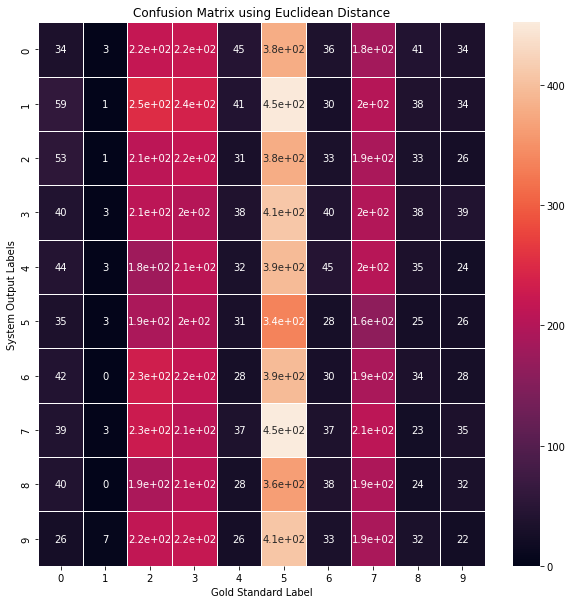

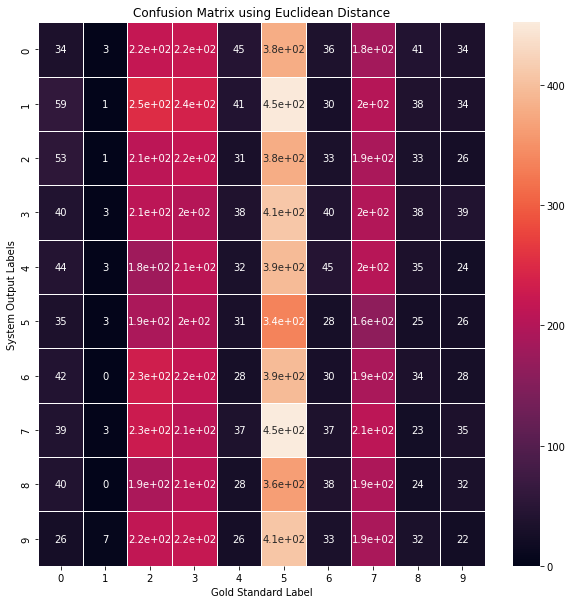

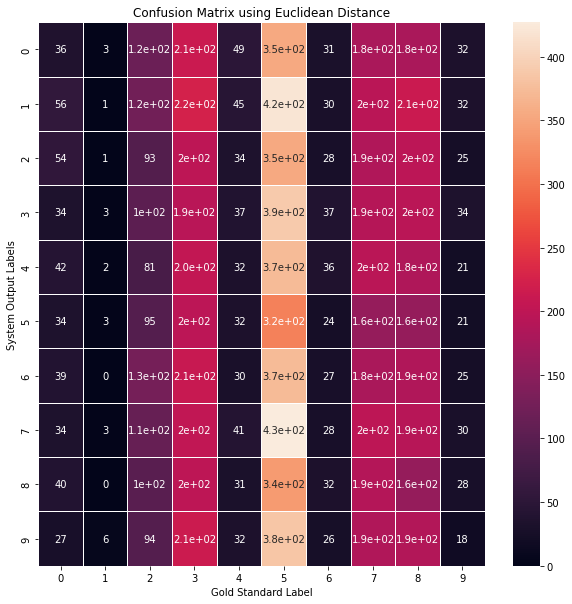

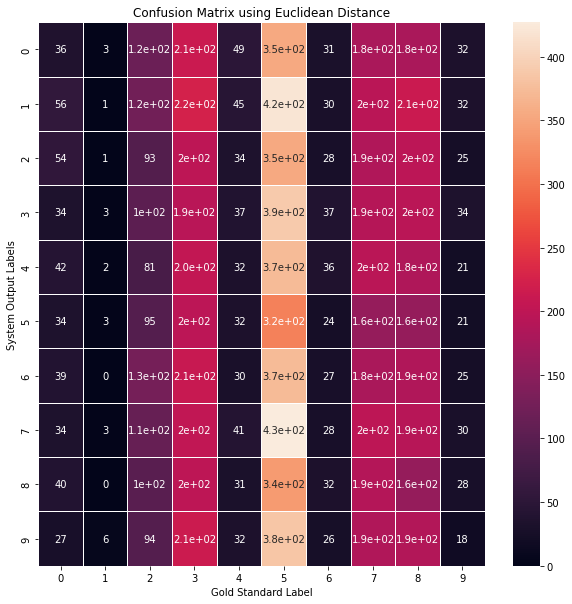

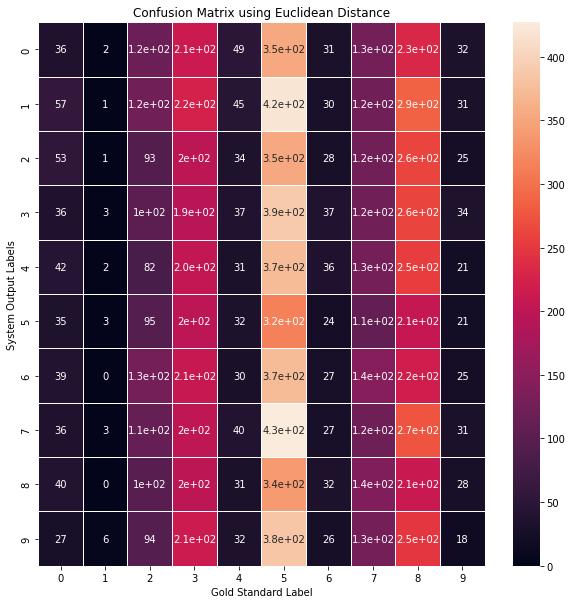

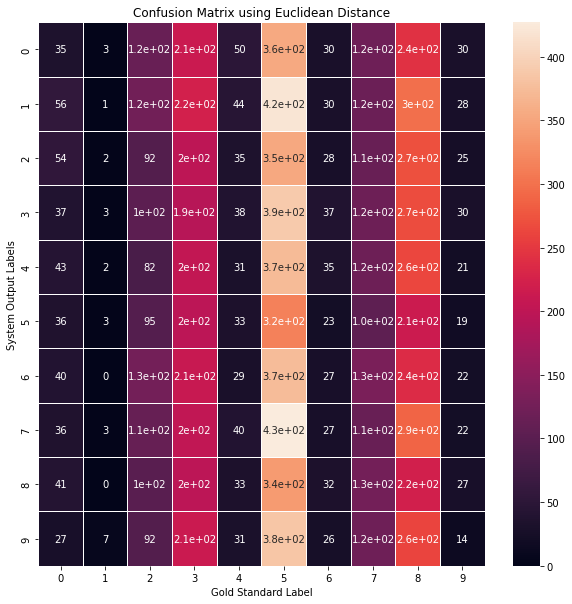

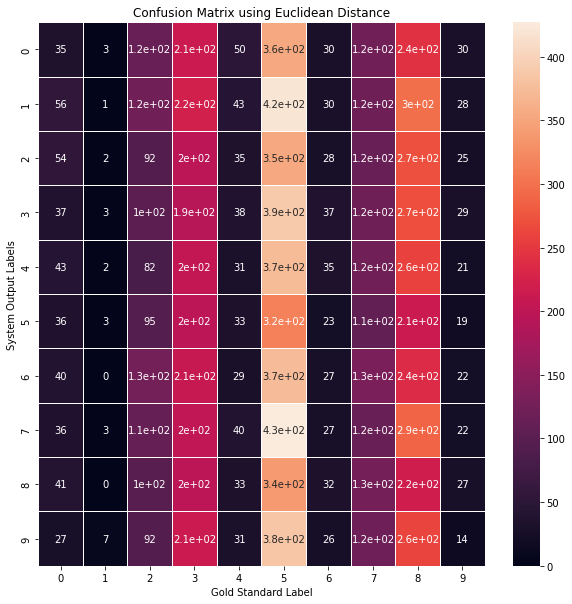

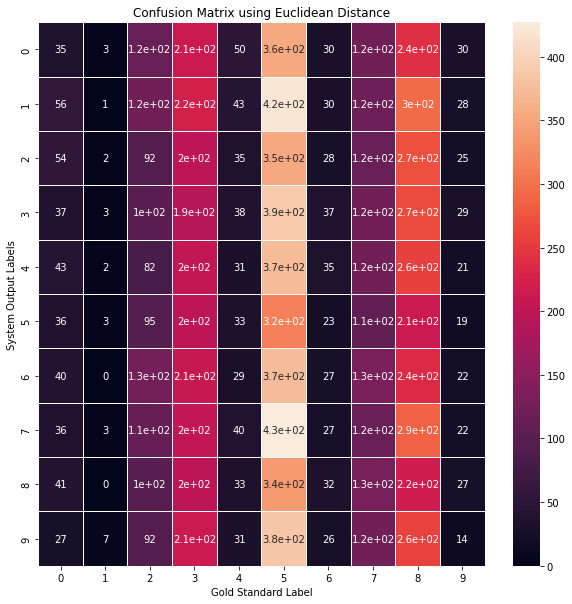

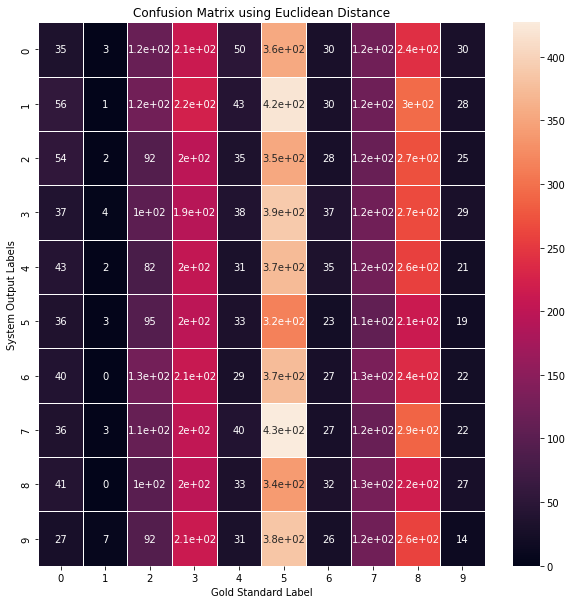

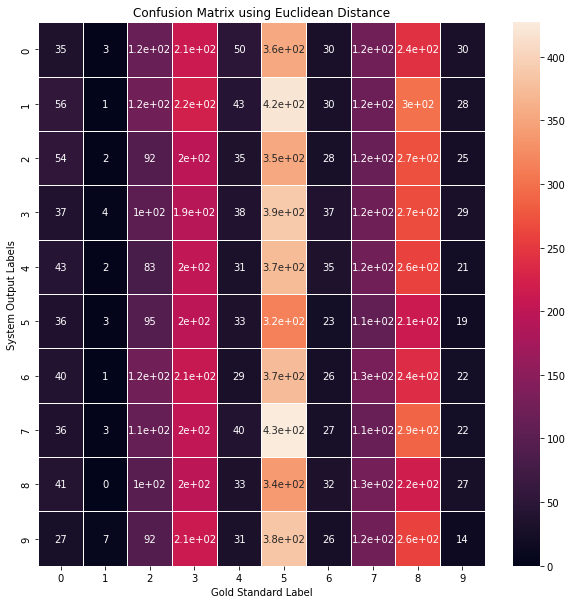

In [55]:
for i in range(len(evaluation_function_ed)):
    plt.figure(figsize=(10,10))
    heat_map = sns.heatmap(evaluation_function_ed[i][0], linewidth = 1 , annot = True)
    plt.title( "Confusion Matrix using Euclidean Distance")
    plt.ylabel('System Output Labels')
    plt.xlabel('Gold Standard Label')
    plt.show()

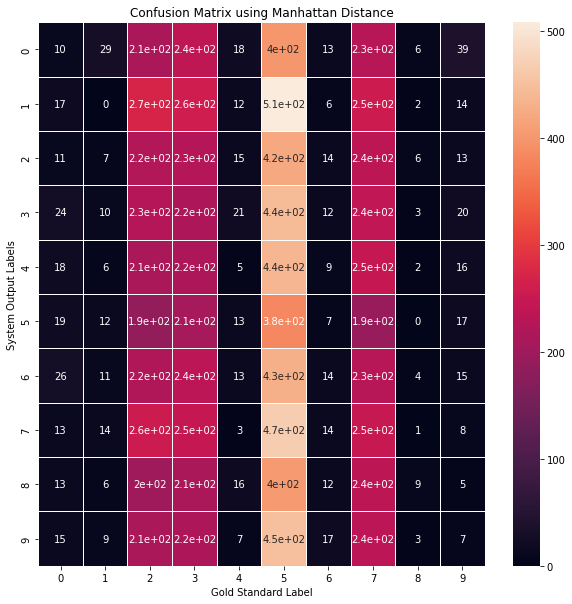

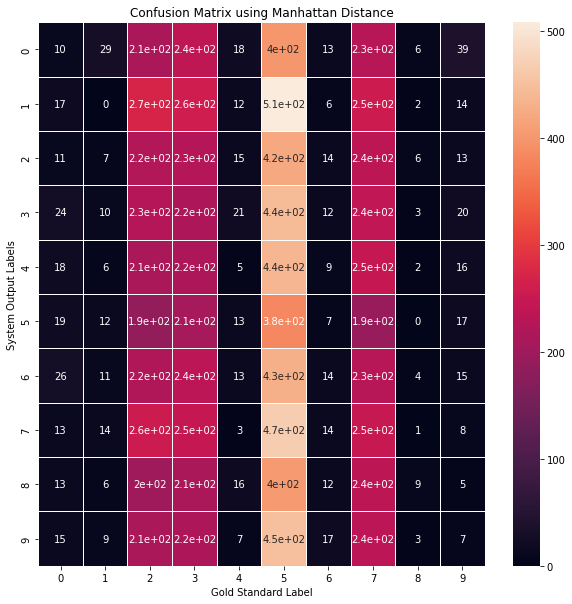

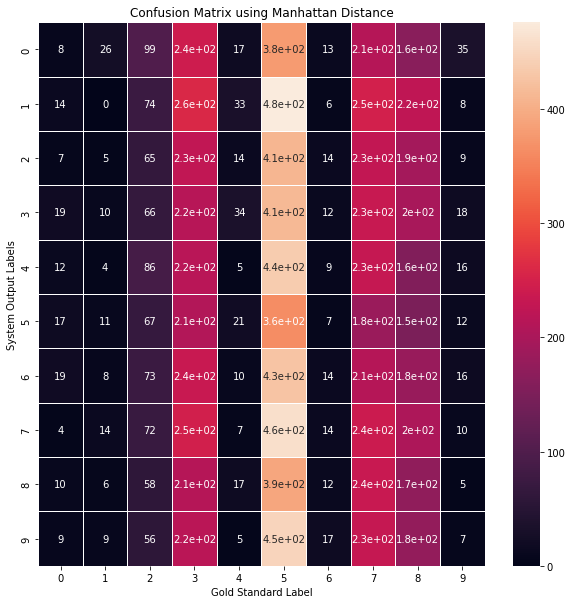

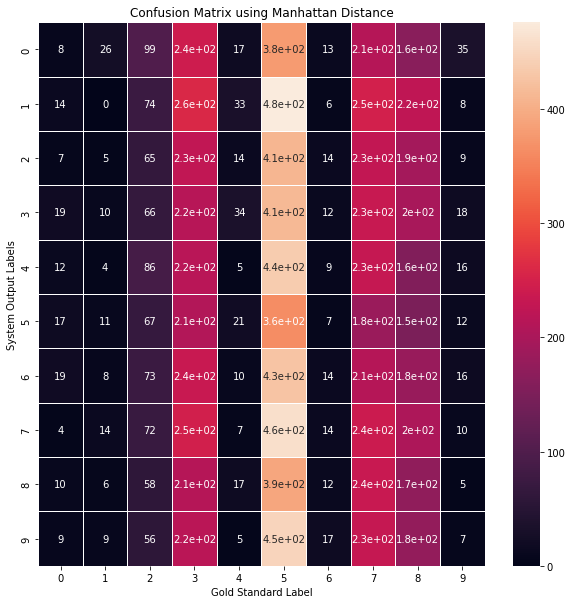

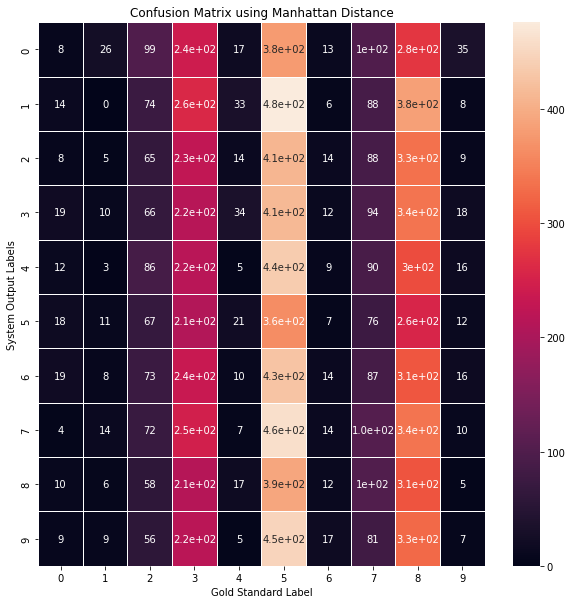

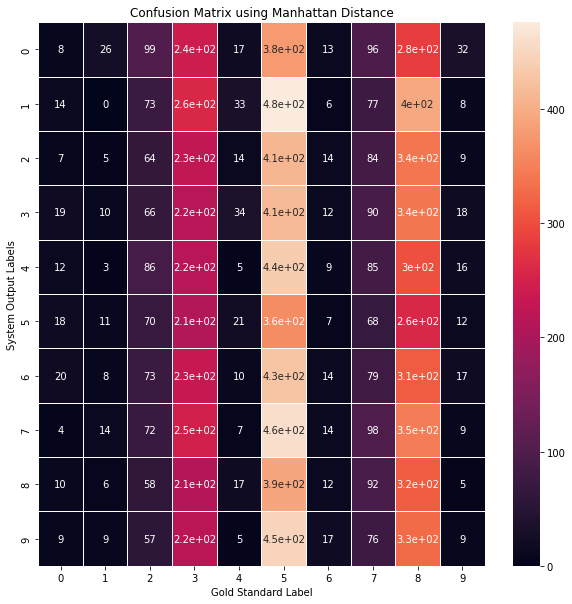

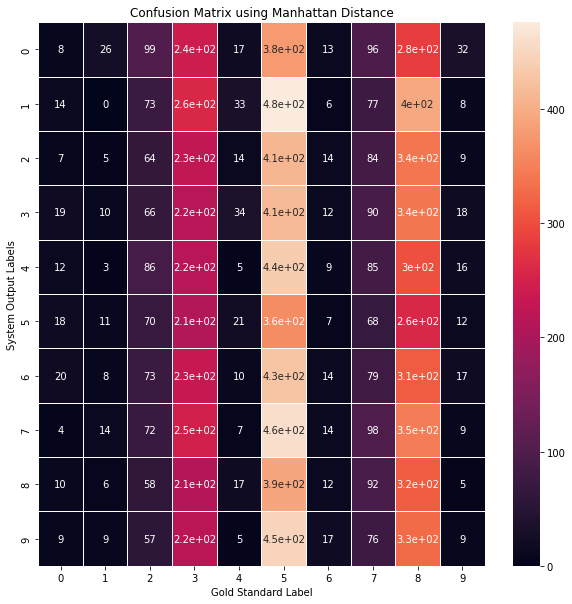

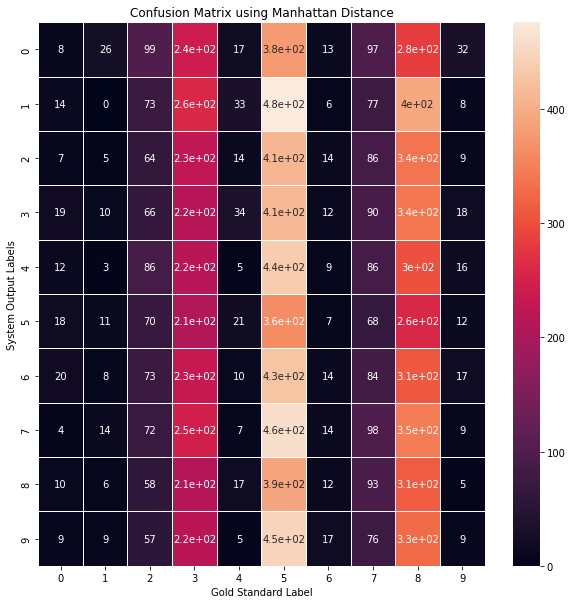

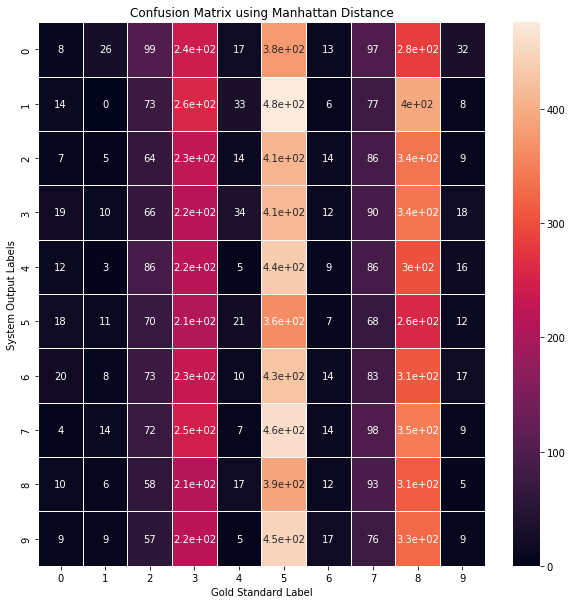

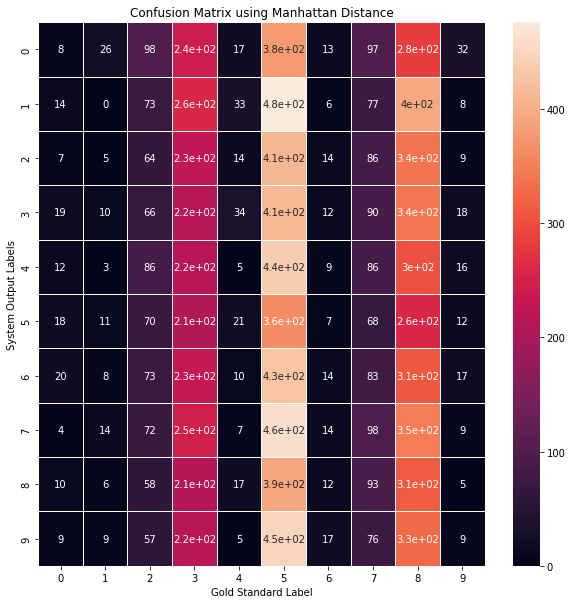

In [44]:
for i in range(len(evaluation_function_md)):
    plt.figure(figsize=(10,10))
    heat_map = sns.heatmap(evaluation_function_md[i][0], linewidth = 1 , annot = True)
    plt.title( "Confusion Matrix using Manhattan Distance" )
    plt.ylabel('System Output Labels')
    plt.xlabel('Gold Standard Label')
    plt.show()

Next, present the results as a graph with k values on the x-axis and classification accuracy
on the y-axis. Use a single plot to compare the two versions of the classifier (one
using Euclidean and the other using Manhattan distance metric). Make another
graph but with the F1 score on the y-axis this time. The graphs should be properly
labeled.

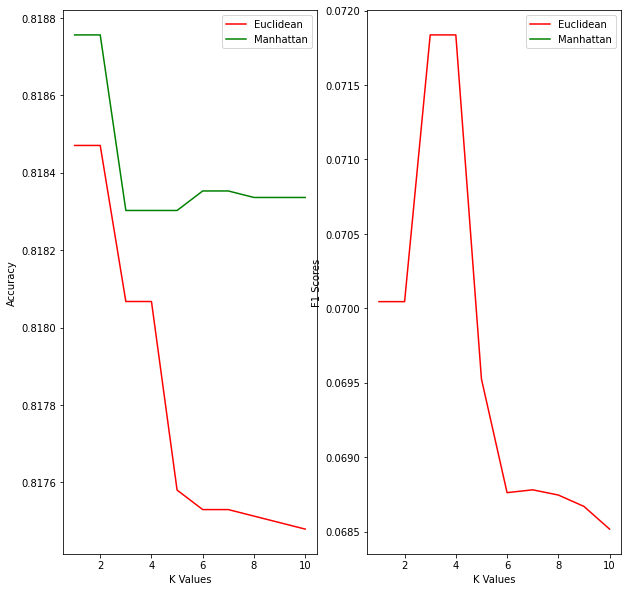

In [79]:
accuracy1 = []
f1_score1 = []
accuracy = []
f1_score = []
for i in range(len(evaluation_function_ed)):
    accuracy1.append(evaluation_function_ed[i][1])
    f1_score1.append(evaluation_function_ed[i][2])
    accuracy.append(evaluation_function_md[i][1])
    f1_score.append(evaluation_function_md[i][2])
k_values = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(k_values, accuracy1, 'r', label='Euclidean')
plt.plot(k_values, accuracy, 'g', label='Manhattan')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(k_values,f1_score1, 'r', label='Euclidean')
plt.plot(k_values,f1_score, 'g', label='Manhattan')
plt.xlabel('K Values')
plt.ylabel('F1 Scores')
plt.legend()

Comment on the best value of k you have found for both distance metrics using
cross-validation. What impact does this value have on the decision boundries generated by the model and the stability of decisions?

In [ ]:
#########################

# Your response

# The value of K I chose for manhattan Distance is 6 because even though the accuracy is higher at k=2 but because with small values of k the decsions are very instable and hence a little better value that I was better is 6.
# The value of k chose for euclidean distance was k =3 and this is because even though accuracy was higher at k = 2 but f score was comparitively very high at k =3 and the trade of 
# of accuracy in this case 0.0003 numbers thus choosing 3 was wise choice. Morever, in terms of stability also k is not a very small small number thus, wouldn't be unstable.  

#########################

Finally, use the best value of k for both distance metrics and run it on the test
dataset. Find the confusion matrix, classification accuracy and F1 score and print
them. Keep in mind the earlier instructions about displaying confusion matrices.

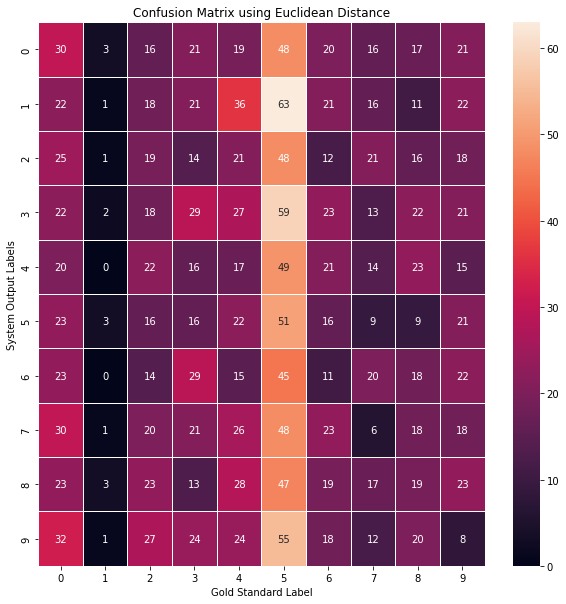

Classification Accuracy: 0.8181904761904762
F1 Score: 0.08211728353789374


In [145]:
predict_labels_euclidean = []
for i in range(len(test_data)):
    predict_labels_euclidean.append(KNN(3,euclideanDistance,test_data[i],train_data, train_label))
cM_Euclidean, acc_Euclidean, f1_score_Euclidean = evaluation_function(test_label, predict_labels_euclidean)
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(cM_Euclidean, linewidth = 1 , annot = True)
plt.title( "Confusion Matrix using Euclidean Distance" )
plt.ylabel('System Output Labels')
plt.xlabel('Gold Standard Label')
plt.show()

print("Classification Accuracy:", acc_Euclidean)
print("F1 Score:", f1_score_Euclidean)

C:\Users\ayesh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


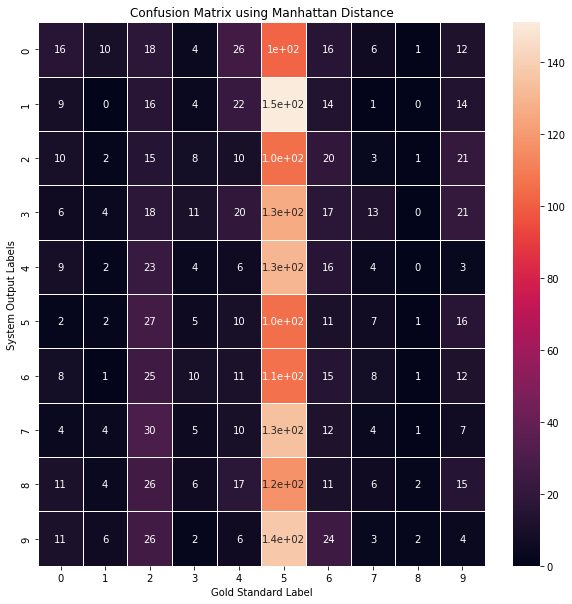

Classification Accuracy: 0.816952380952381
F1 Score: nan


In [139]:
# Use best values of k on test dataset

#########################

# Enter your code here
predict_labels_manhattan = []
for i in range(len(test_data)):
    predict_labels_manhattan.append(KNN(6,manhattanDistance,test_data[i],train_data, train_label))
cM_Manhattan, acc_Manhattan, f1_score_Manhattan = evaluation_function(test_label, predict_labels_manhattan)
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(cM_Manhattan, linewidth = 1 , annot = True)
plt.title( "Confusion Matrix using Manhattan Distance" )
plt.ylabel('System Output Labels')
plt.xlabel('Gold Standard Label')
plt.show()

print("Classification Accuracy:", acc_Manhattan)
print("F1 Score:", f1_score_Manhattan)
#########################

## **Part 2: Implement using Scikit-Learn**

In this part, you have to use [scikit-learn's k-NN implementation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to train and test your
classifier on the dataset used in Part 1. Repeat the tasks you have done in Part 1
but this time using scikit-learn. Perform 5-fold cross-validation and run
the k-NN classifier for values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 using both Euclidean
and Manhattan distance. Use scikit-learn's [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to calculate the
accuracy, [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to calculate macro-average F1 score,
and [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix from the predicted labels. Also present
the results as a graph with k values on the x-axis and performance measures on the y-axis
just like you did in Part 1. Use a single plot to compare the two versions of the classifier
(one using Euclidean and the other using Manhattan distance metric). Finally, print the
best values of k for both distance metrics. Then use these values of k on the test dataset and print the evaluation scores and confusion matrix for each of the distance metrics.

Note that the confusion matrices must be displayed in the same way as in Part 1.

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix

pred_E = []
pred_M = []
for i in range(1,11):
  knnE = KNeighborsClassifier(n_neighbors = i,p = 2, metric='minkowski')
  knnM = KNeighborsClassifier(n_neighbors = i,p = 1, metric='minkowski')
  pred_E.append(cross_val_predict(estimator=knnE, X=train_data, y=train_label, cv=5))
  pred_M.append(cross_val_predict(estimator=knnM, X=train_data, y=train_label, cv=5))

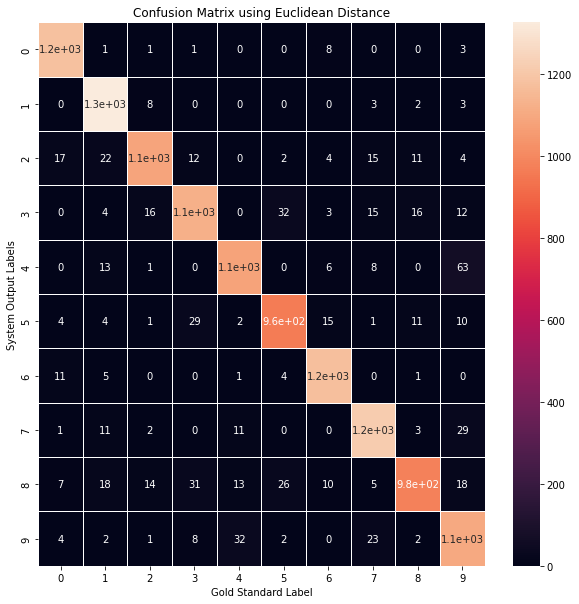

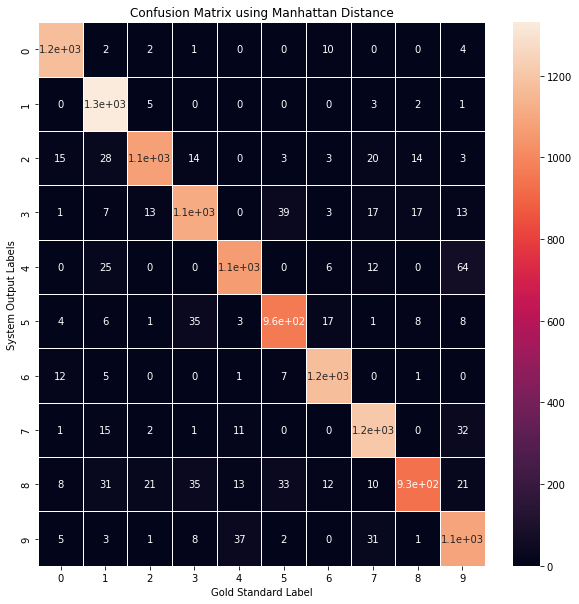

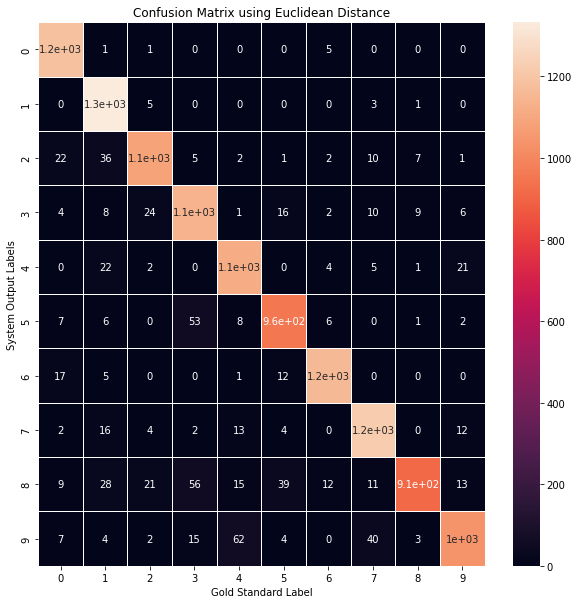

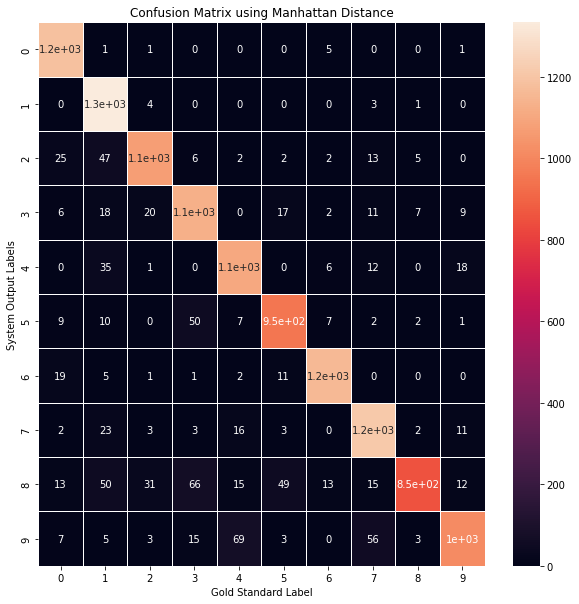

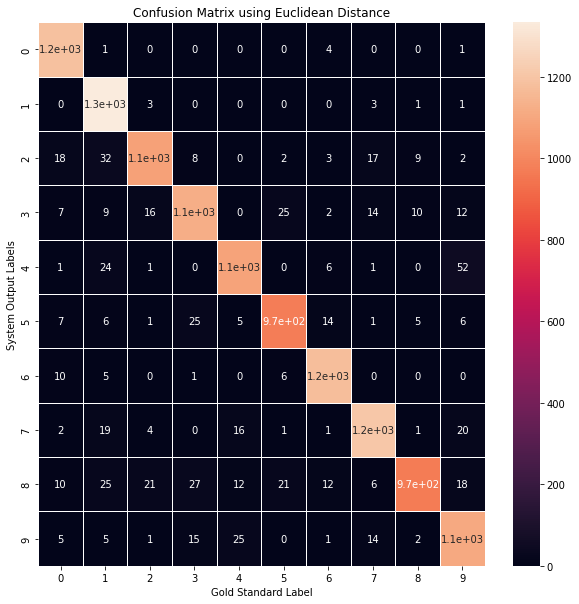

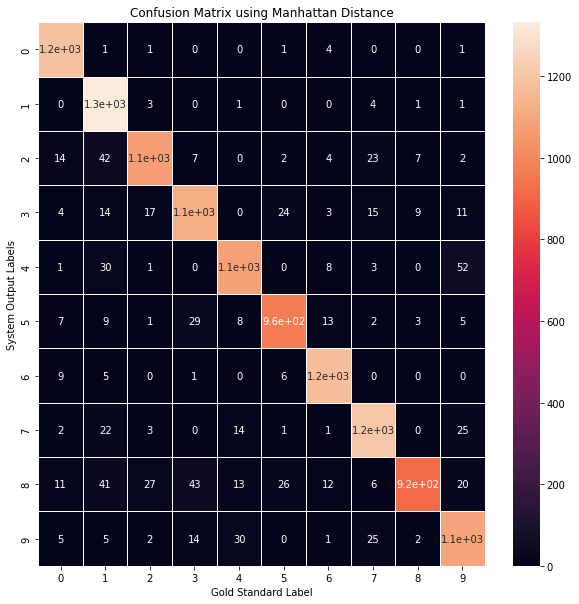

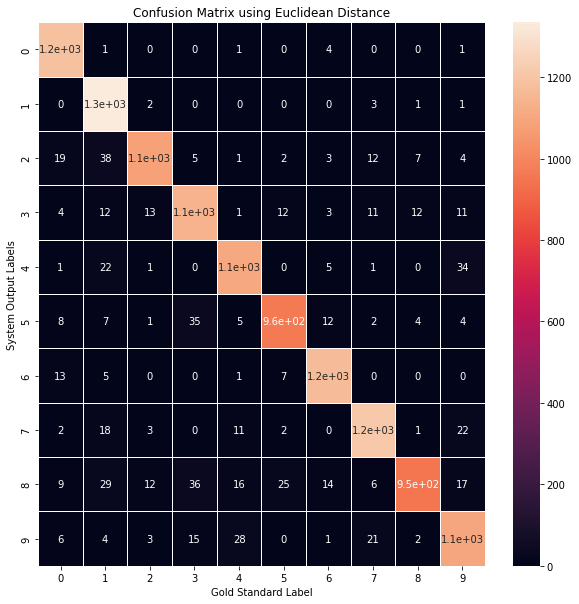

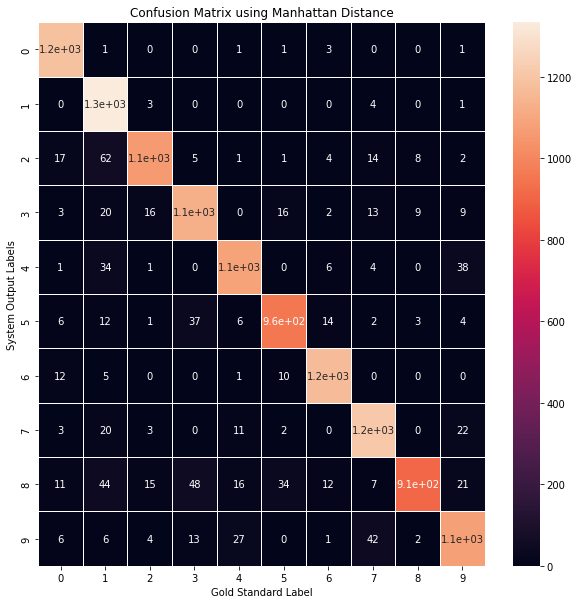

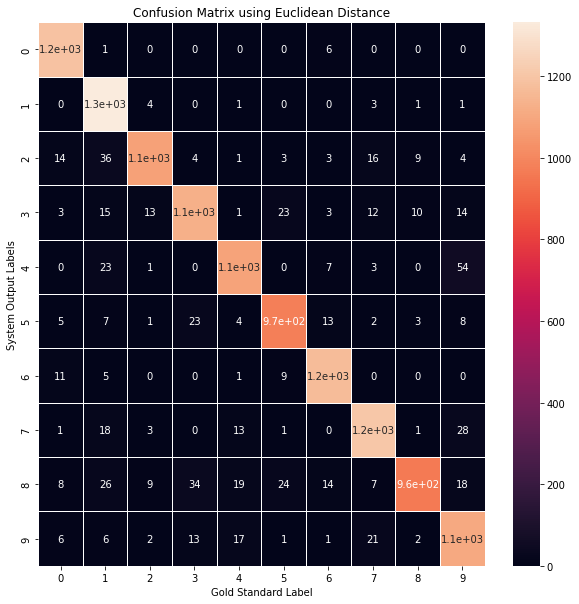

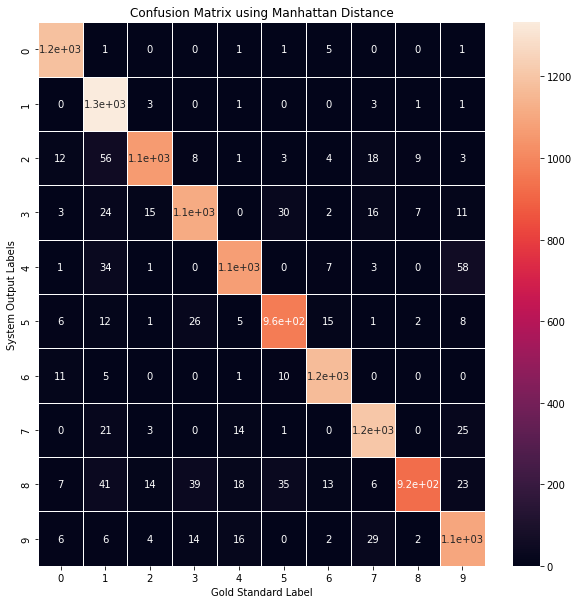

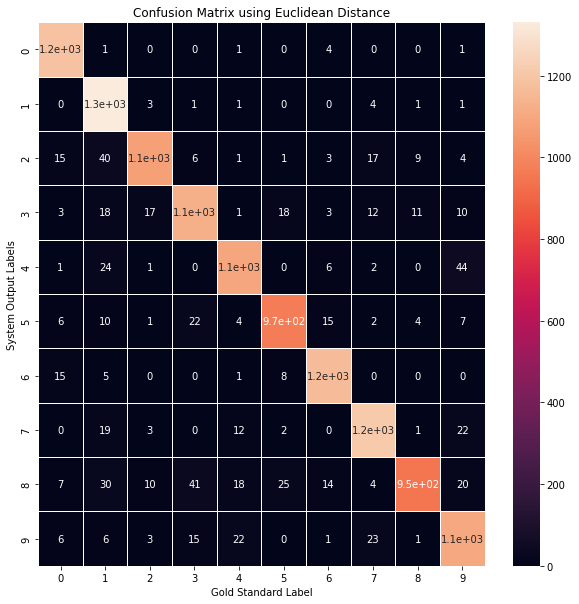

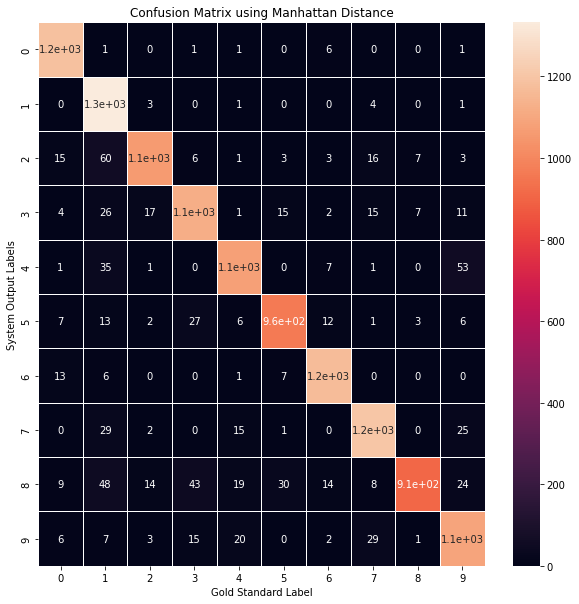

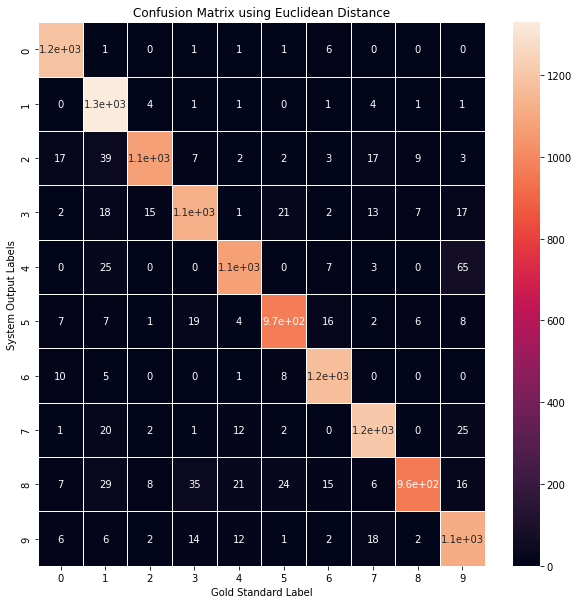

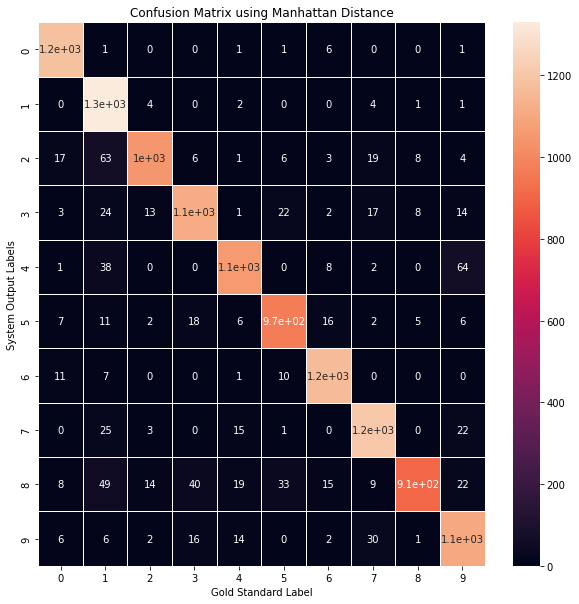

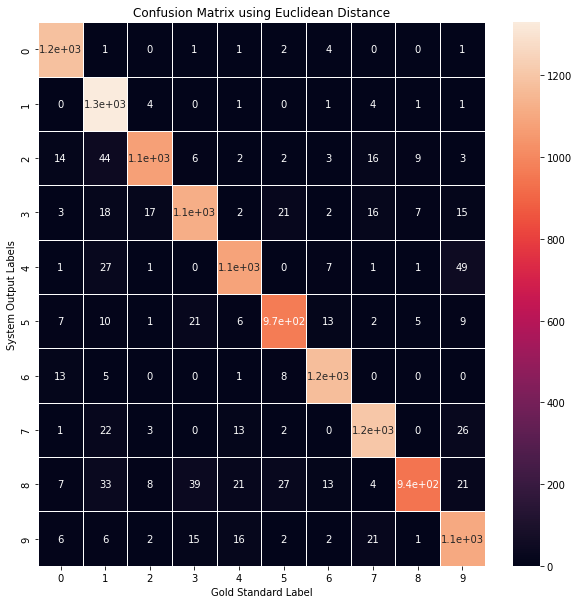

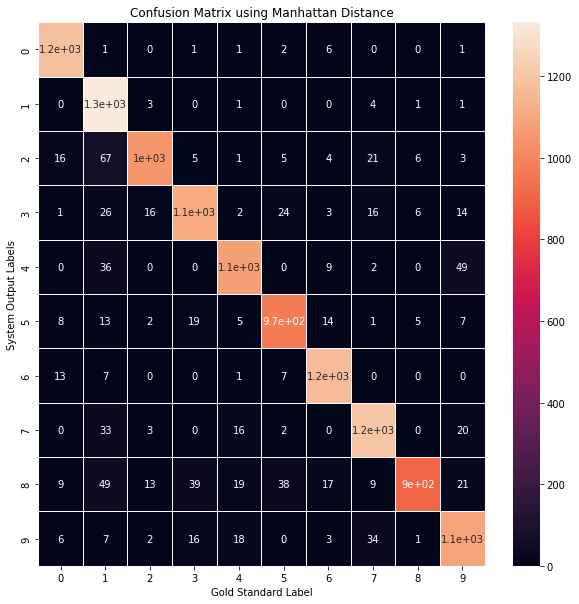

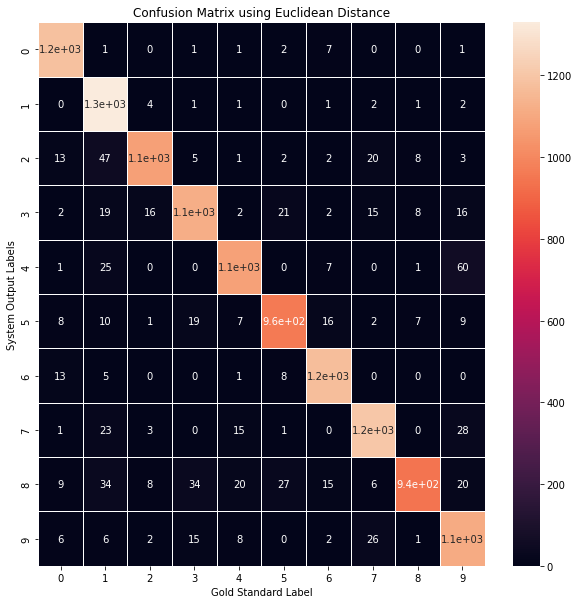

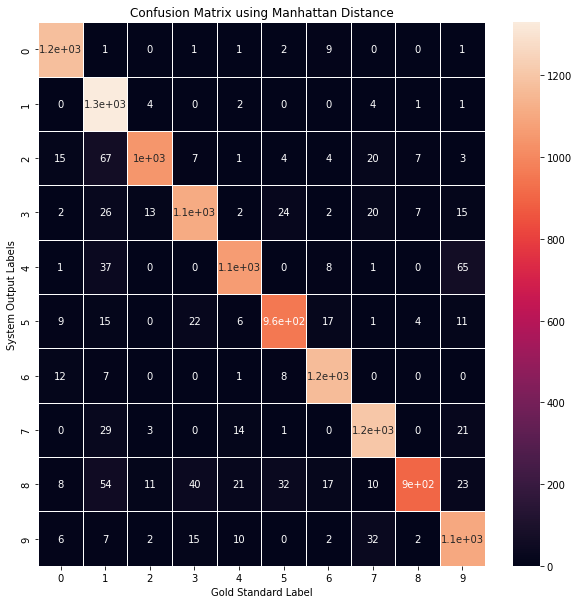

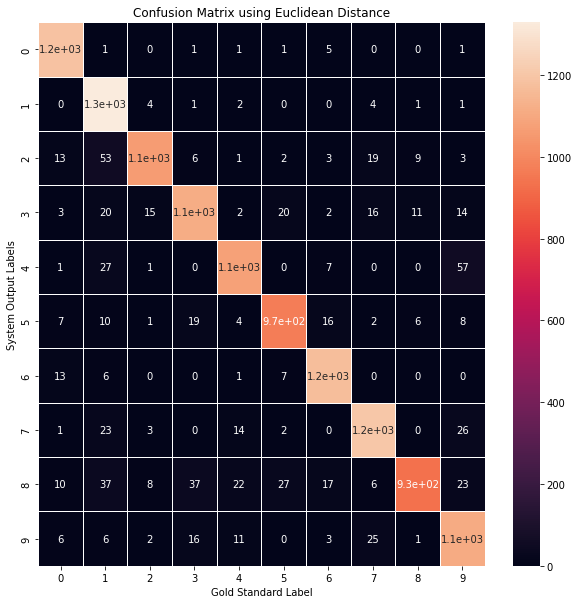

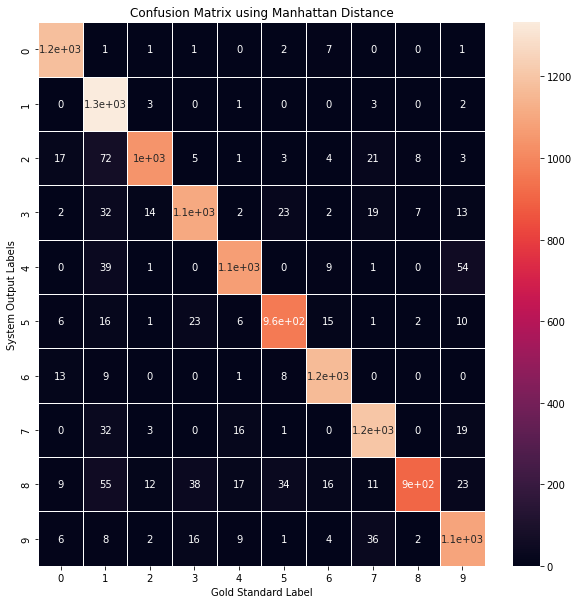

In [66]:
from sklearn.metrics import precision_recall_fscore_support
accuracy_E = []

f1_score_E = []
f1_score_M = []

accuracy_M = []
for i in range(len(pred_E)):
  
  accuracy_E.append(accuracy_score(train_label,pred_E[i]))
  accuracy_M.append(accuracy_score(train_label,pred_M[i]))
  
  f1_score_E.append(precision_recall_fscore_support(train_label,pred_E[i], average='macro')[2])
  f1_score_M.append(precision_recall_fscore_support(train_label,pred_M[i], average='macro')[2])
  
  plt.figure(figsize=(10,10))
  heat_map = sns.heatmap(confusion_matrix(train_label, pred_E[i]), linewidth = 1 , annot = True)
  plt.title( "Confusion Matrix using Euclidean Distance" )
  plt.ylabel('System Output Labels')
  plt.xlabel('Gold Standard Label')
  plt.show()
  
  plt.figure(figsize=(10,10))
  heat_map = sns.heatmap(confusion_matrix(train_label, pred_M[i]), linewidth = 1 , annot = True)
  plt.title( "Confusion Matrix using Manhattan Distance" )
  plt.ylabel('System Output Labels')
  plt.xlabel('Gold Standard Label')
  plt.show()

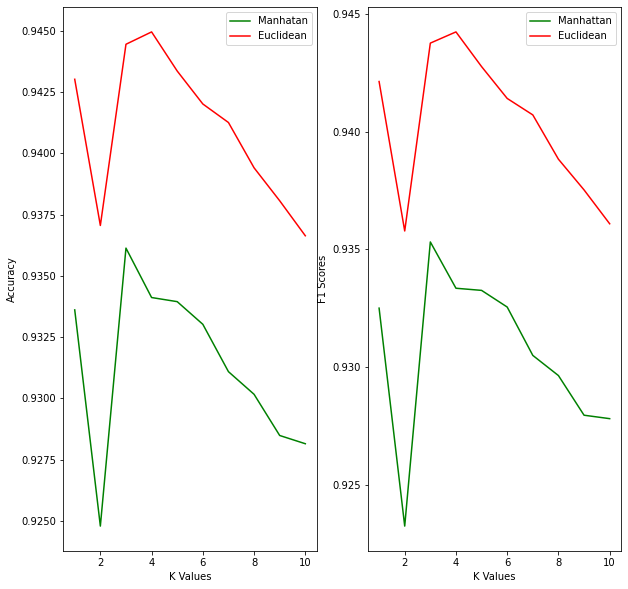

In [67]:
k_values = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(k_values,accuracy_M, 'g', label='Manhatan')
plt.plot(k_values,accuracy_E, 'r', label='Euclidean')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(k_values,f1_score_M, 'g', label='Manhattan')
plt.plot(k_values,f1_score_E, 'r', label='Euclidean')
plt.xlabel('K Values')
plt.ylabel('F1 Scores')
plt.legend()

The best values of K for Euclidean Distance is 5. The best value for K for Manhattan Distance is 3. This because in both the graphs after this value of K there is a dip.

In [68]:
predicting_test_labels_E = []
predicting_test_labels_M = []
knnE = KNeighborsClassifier(n_neighbors = 5,p = 2, metric='minkowski')
knnM = KNeighborsClassifier(n_neighbors = 3,p = 1, metric='minkowski')
knnE.fit(train_data, train_label)
knnM.fit(train_data, train_label)
predicting_test_labels_E = knnE.predict(test_data)
predicting_test_labels_M = knnM.predict(test_data)

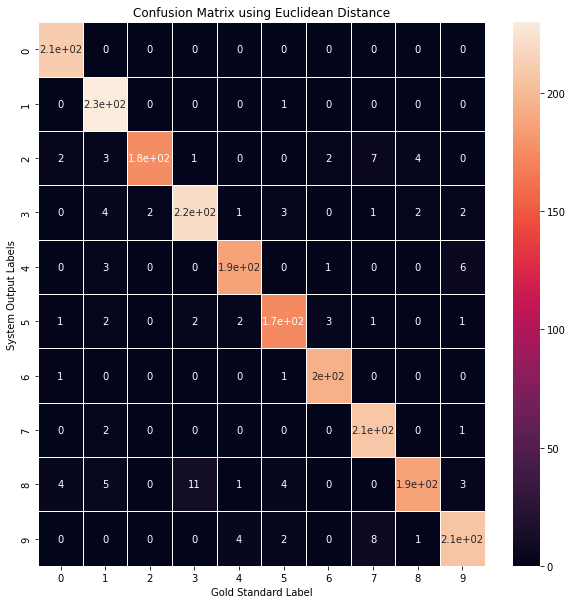

Classification Accuracy: 0.95
F1 Score: 0.9498761314388181


In [80]:
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(confusion_matrix(test_label, predicting_test_labels_E), linewidth = 1 , annot = True)
plt.title( "Confusion Matrix using Euclidean Distance" )
plt.ylabel('System Output Labels')
plt.xlabel('Gold Standard Label')
plt.show()

print("Classification Accuracy:", accuracy_score(test_label, predicting_test_labels_E))
print("F1 Score:", precision_recall_fscore_support(test_label, predicting_test_labels_E, average='macro')[2])

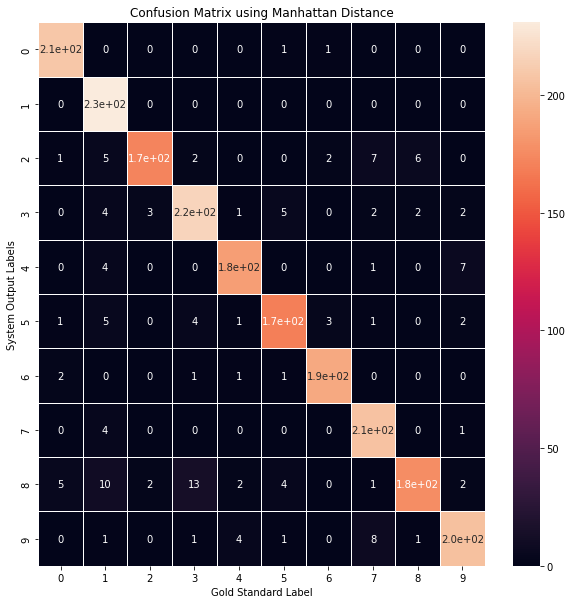

Classification Accuracy: 0.9342857142857143
F1 Score: 0.9342069633932907


In [81]:
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(confusion_matrix(test_label, predicting_test_labels_M), linewidth = 1 , annot = True)
plt.title( "Confusion Matrix using Manhattan Distance" )
plt.ylabel('System Output Labels')
plt.xlabel('Gold Standard Label')
plt.show()

print("Classification Accuracy:", accuracy_score(test_label, predicting_test_labels_M))
print("F1 Score:", precision_recall_fscore_support(test_label, predicting_test_labels_M, average='macro')[2])